<p style="color:brown;font-size:large">Three Graces Dance the Bernoulli Walz (<a href="https://www.youtube.com/watch?v=mmCnQDUSO4I">Dmitri's Bernoulli Walz</a>)</p>

We define three sequences of polynomials:

    b(n, x) = Bernoulli(2n, x)
    z(n, x) = ZetaPolynomial(2n, x)
    c(n, x) = Curtright(n, x)

We want to illustarte how the three polynomial sequences 
compare on the interval [0, 1]. 

We know that b(n, 0) = b(n, 1) = z(n, 1) = c(n, 1) = Bernoulli(2n),
and z(n, 0) = c(n, 0) = 0 for n > 0, and z(n, 1/2) = 0. 

For a better visual representation, the functions are scaled by 1/n!.

The Zeta polynomials were introduced in https://oeis.org/wiki/User:Peter_Luschny/ZetaPolynomials
and the Curtright polynomials in 'Scale Invariant Scattering and the Bernoulli Numbers' (arXiv:2401.00586) by Thomas Curtright.

See also the sequences A368846, A368847/A368848 and A342322 in the OEIS.

In [1]:
def ZetaPolynomial(n, x):
    return expand(sum(binomial(n+1, k+1)*bernoulli_polynomial(1, n - k)*(x - 1)^k 
           for k in range(n + 1)) / (n + 1))    

In [2]:
def A368846(n, k):
    if k == 0: return k^n
    return (-1)^(n + 1)*2*binomial(2*k - 1, n)*binomial(2*n + 1, 2*k)

M = matrix(ZZ, 20, 20, lambda n,k: A368846(n, k) if k <= n else 0).inverse()
def c(n,x): return sum(M[n][k]*x^k for k in range(n+1))

In [3]:
def myplot(a,b):
    for n in range(a, b): 
       u = plot([bernoulli_polynomial(x, 2*n)/factorial(n), 
             c(n, x)/factorial(n),
             ZetaPolynomial(2*n, x)/factorial(n)
            ], (x, 0, 1))
       v = point((1, bernoulli(2*n)/factorial(n)), size=22, rgbcolor=hue(1), 
             legend_label='red=Zeta,blue=Bernoulli,green=Curtright')
       show(u + v, legend_title='n = '+ str(2*n))

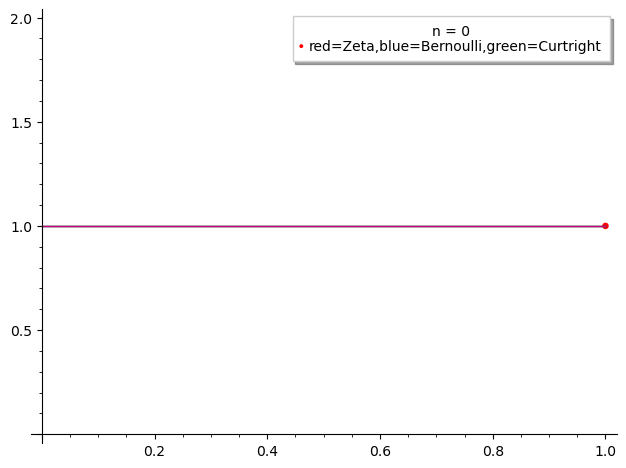

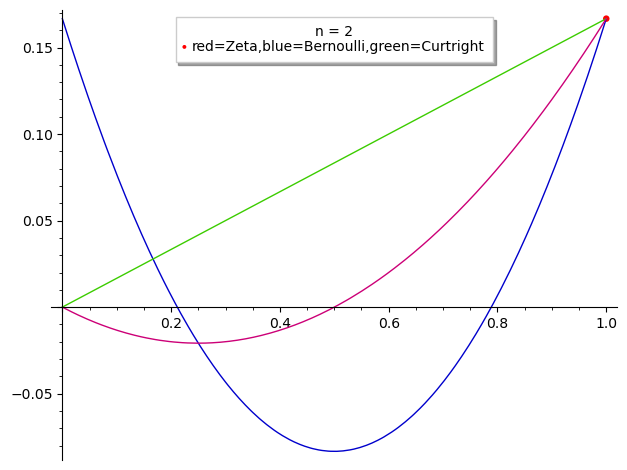

In [4]:
myplot(0, 2)

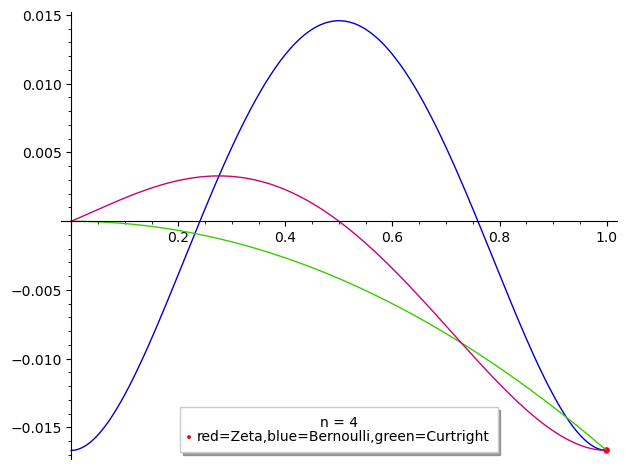

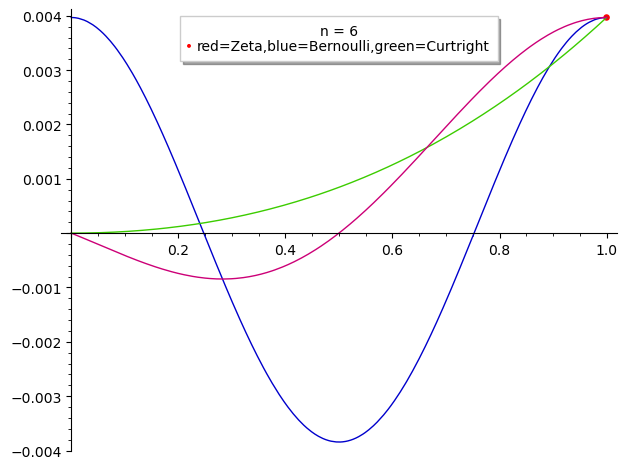

In [5]:
myplot(2, 4)

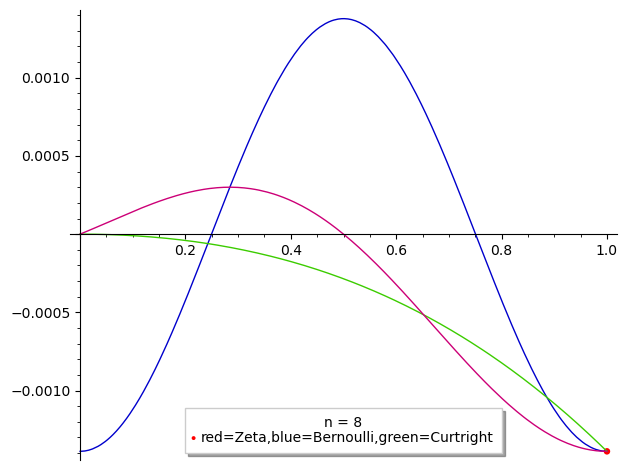

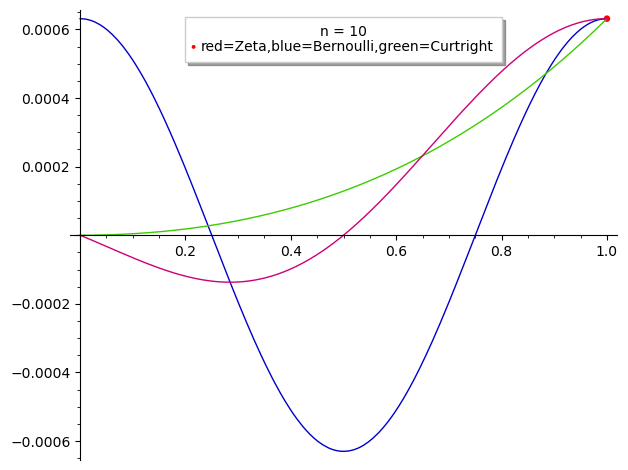

In [6]:
myplot(4, 6)

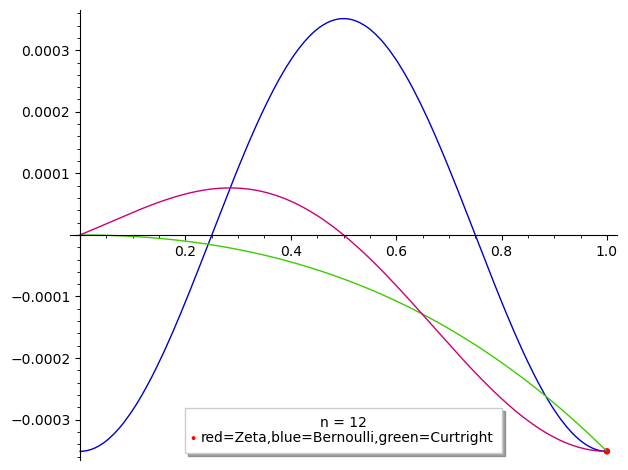

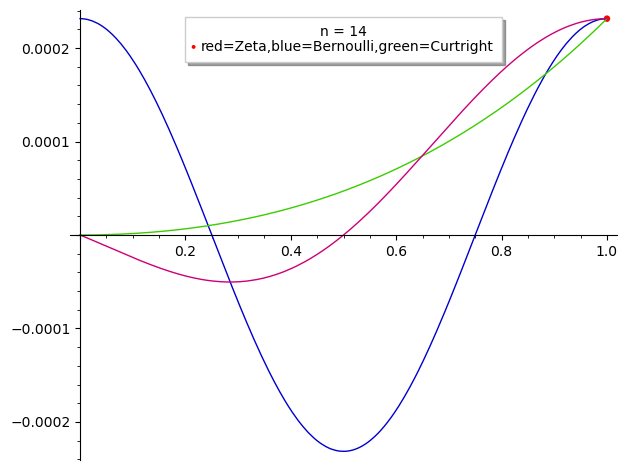

In [7]:
myplot(6, 8)

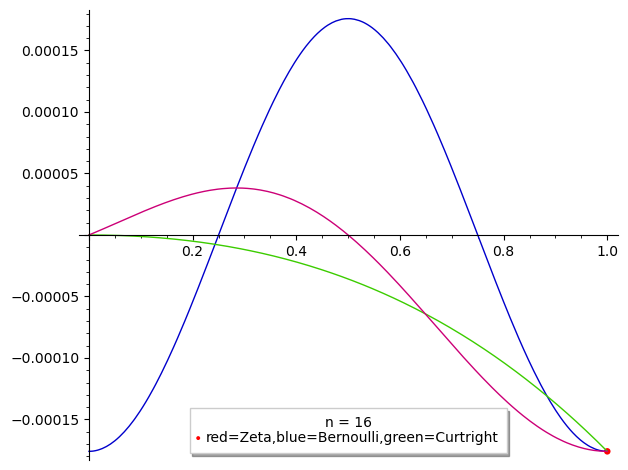

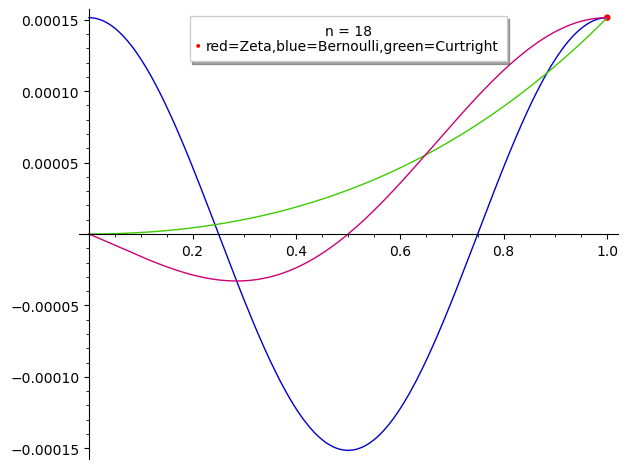

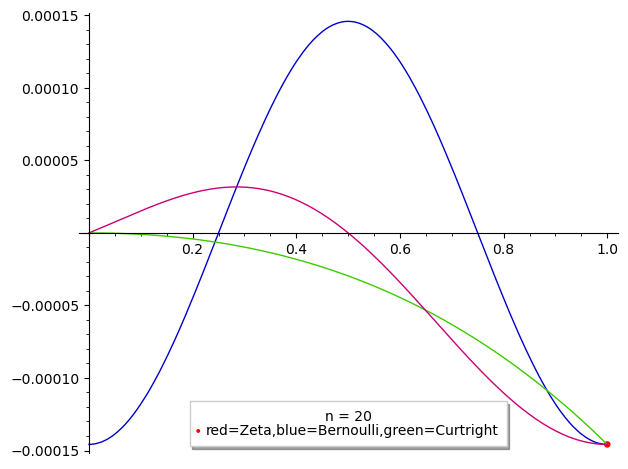

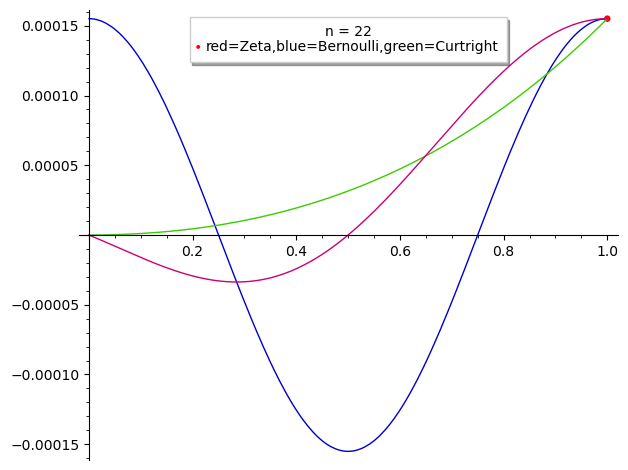

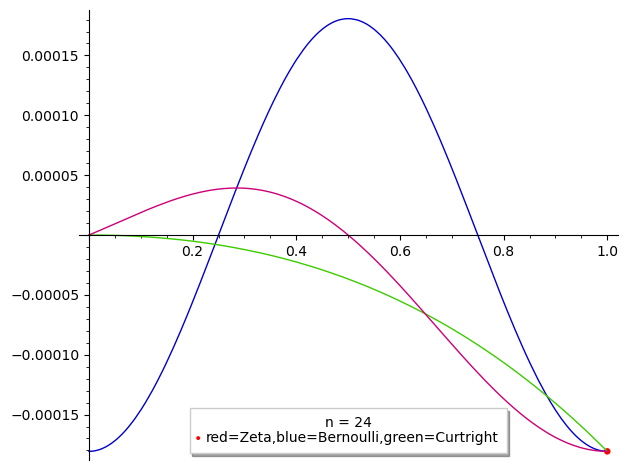

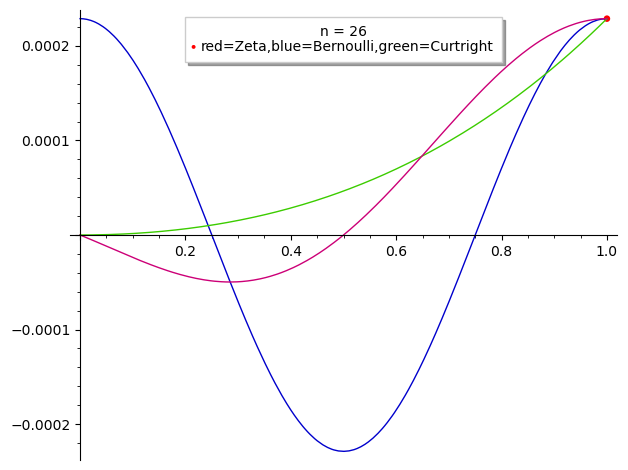

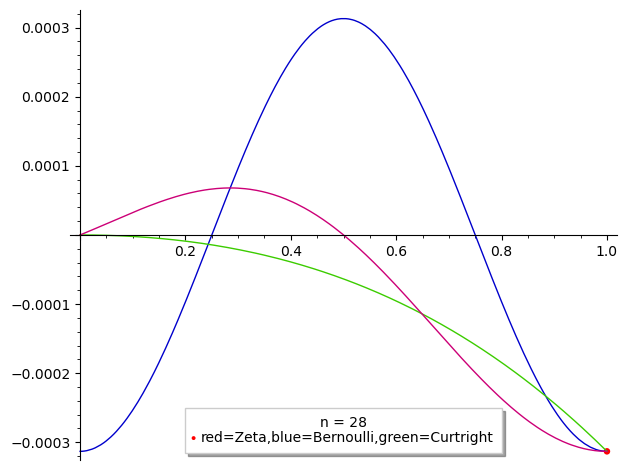

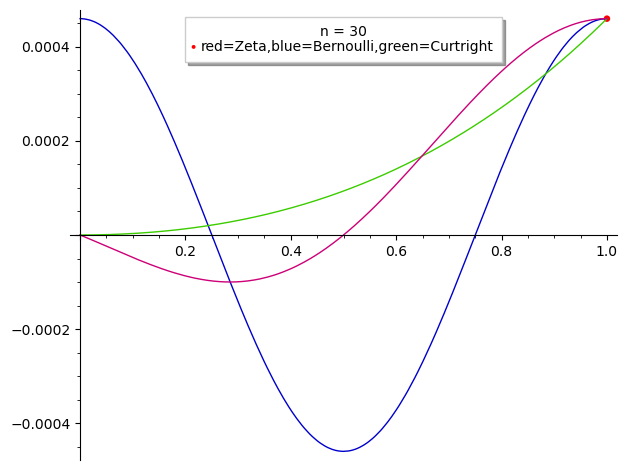

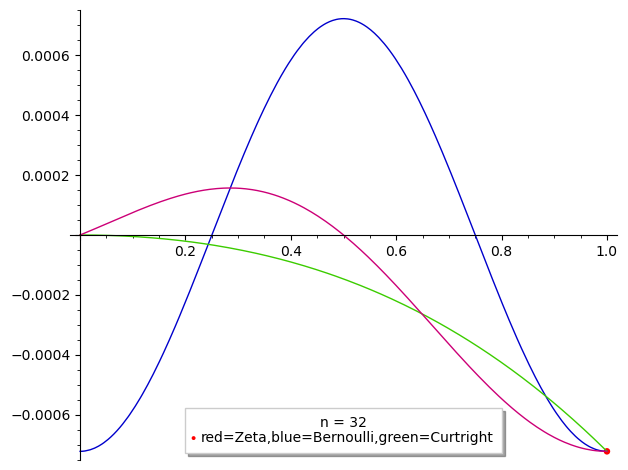

In [8]:
myplot(8, 17)